# 数値解析2020 レポート


**XIV-B.**


以下Python3を用いたプログラム例を示す。

In [ ]:
# Pythonのバージョン確認
import sys
print(sys.version)

3.6.9 (default, Oct  8 2020, 12:12:24) 
[GCC 8.4.0]


# XIV-B 表示用コード

In [ ]:
# Y = 0 のラインを T = 1 に 他の周りを T = 0 で固定
import numpy as np

def T_print(N, T):
    for i in range(N+2):
        for j in range(N+2):
            print("{:.3f} ".format(T[j, N+1 - i]), end="")
        print()
    print()

def T_bulk_update(N, T, T_next):
    for i in range(1, N+1):
        for j in range(1, N+1):
            T_tmp = 0; count = 0
            if i >= 2:
                T_tmp += T[i-1, j]; count += 1
            if i <= N - 1:
                T_tmp += T[i+1, j]; count += 1
            if j >= 2:
                T_tmp += T[i, j-1]; count += 1
            if j <= N - 1:
                T_tmp += T[i, j+1]; count += 1
            T_next[i, j] = (1 - count * (dt/h**2)) * T[i,j] + (dt/h**2) * T_tmp
    for i in range(1, N+1):
        for j in range(1, N+1):
            T[i, j] = T_next[i, j]

def T_boundary_update(N, T):
    for i in range(1, N+1):
        T[i, 0] = T[i, 1]
        T[i, N+1] = T[i, N]
    for j in range(1, N+1):
        T[0, j] = T[1, j]
        T[N+1, j] = T[N, j]

'''
    for i in range(1, N+1):
        T_next[i, 0] = (1-2*(dt/h**2)) * T[i, 0] + (dt/h**2) * (T[i-1, 0] + T[i+1, 0])
        T_next[i, N+1] = (1-2*(dt/h**2)) * T[i, N+1] + (dt/h**2) * (T[i-1, N+1] + T[i+1, N+1])
    for j in range(1, N+1):
        T_next[0, j] = (1-2*(dt/h**2)) * T[0, j] + (dt/h**2) * (T[0, j-1] + T[0, j+1])
        T_next[N+1, j] = (1-2*(dt/h**2)) * T[N+1, j] + (dt/h**2) * (T[N+1, j-1] + T[N+1, j+1])
'''

'''
def T_corner_points_update(N, T): # SAME AS BELOW
    T[0, 0] = T[0, 1] + T[1, 0] - T[1, 1]
    T[0, N+1] = T[0, N] + T[1, N+1] - T[1, N]
    T[N+1, 0] = T[N+1, 1] + T[N, 0] - T[N, 1]
    T[N+1, N+1] = T[N+1, N] + T[N, N+1] - T[N, N]
'''

def T_corner_points_update(N, T):
    T[0, 0] = (T[0, 1] + T[1, 0])/2.
    T[0, N+1] = (T[0, N] + T[1, N+1])/2.
    T[N+1, 0] = (T[N+1, 1] + T[N, 0])/2.
    T[N+1, N+1] = (T[N+1, N] + T[N, N+1])/2.

N = 10
T = np.zeros((N+2)**2)
T = T.reshape(N+2, N+2) # T[X, Y]
T[:, 0] = 1

for k in range(200):
    for i in range(1, N+1):
        for j in range(1, N+1):
            T[i, j] = 0.25 * (T[i-1, j] + T[i+1, j] + T[i, j-1] + T[i, j+1])

T_print(N, T)

h = 1/(N+1)
dt = 0.001

T_next = np.zeros((N+2)**2)
T_next = T_next.reshape(N+2, N+2) # T_next[X, Y]
for k in range(1001):
    T_bulk_update(N, T, T_next)
    T_boundary_update(N, T)
    T_corner_points_update(N, T)
    if k == 9:
        print("t = ", dt * (k+1))
        T_print(N, T)
    elif k == 99:
        print("t = ", dt * (k+1))
        T_print(N, T)
    elif k == 199:
        print("t = ", dt * (k+1))
        T_print(N, T)
    elif k == 299:
        print("t = ", dt * (k+1))
        T_print(N, T)

0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 
0.000 0.009 0.017 0.024 0.029 0.032 0.032 0.029 0.024 0.017 0.009 0.000 
0.000 0.019 0.036 0.051 0.061 0.066 0.066 0.061 0.051 0.036 0.019 0.000 
0.000 0.031 0.059 0.081 0.097 0.105 0.105 0.097 0.081 0.059 0.031 0.000 
0.000 0.045 0.086 0.119 0.141 0.153 0.153 0.141 0.119 0.086 0.045 0.000 
0.000 0.064 0.121 0.166 0.197 0.213 0.213 0.197 0.166 0.121 0.064 0.000 
0.000 0.089 0.167 0.227 0.268 0.287 0.287 0.268 0.227 0.167 0.089 0.000 
0.000 0.126 0.232 0.309 0.359 0.382 0.382 0.359 0.309 0.232 0.126 0.000 
0.000 0.184 0.324 0.419 0.475 0.501 0.501 0.475 0.419 0.324 0.184 0.000 
0.000 0.285 0.464 0.566 0.622 0.646 0.646 0.622 0.566 0.464 0.285 0.000 
0.000 0.491 0.679 0.761 0.800 0.815 0.815 0.800 0.761 0.679 0.491 0.000 
1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 

t =  0.01
0.030 0.030 0.036 0.045 0.053 0.057 0.057 0.053 0.045 0.036 0.030 0.030 
0.030 0.030 0.036 0.045 0.053 0.057 0.05

t = 0


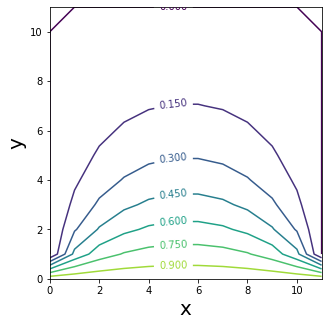

t =  0.001


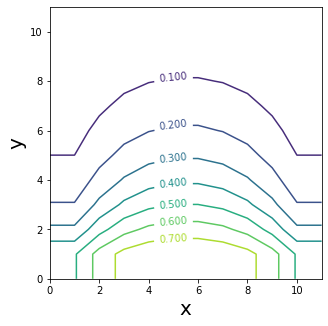

t =  0.01


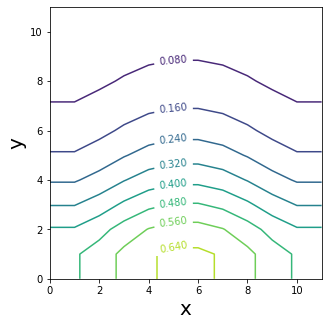

t =  0.1


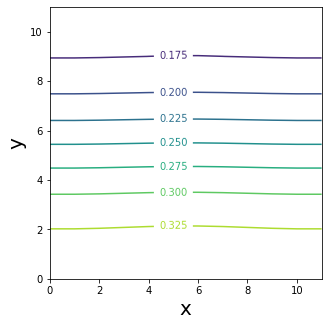

t =  1.0


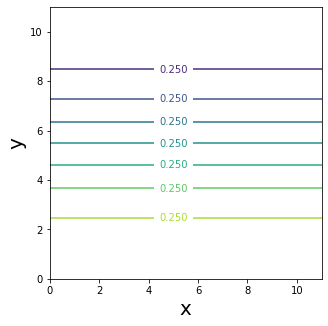

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def T_bulk_update(N, T, T_next):
    for i in range(1, N+1):
        for j in range(1, N+1):
            T_tmp = 0; count = 0
            if i >= 2:
                T_tmp += T[i-1, j]; count += 1
            if i <= N - 1:
                T_tmp += T[i+1, j]; count += 1
            if j >= 2:
                T_tmp += T[i, j-1]; count += 1
            if j <= N - 1:
                T_tmp += T[i, j+1]; count += 1
            T_next[i, j] = (1 - count * (dt/h**2)) * T[i,j] + (dt/h**2) * T_tmp
    for i in range(1, N+1):
        for j in range(1, N+1):
            T[i, j] = T_next[i, j]

def T_boundary_update(N, T, T_next):
    for i in range(1, N+1):
        T[i, 0] = T_next[i, 1]
        T[i, N+1] = T_next[i, N]
    for j in range(1, N+1):
        T[0, j] = T_next[1, j]
        T[N+1, j] = T_next[N, j]

def T_corner_points_update(N, T):
    T[0, 0] = (T[0, 1] + T[1, 0])/2.
    T[0, N+1] = (T[0, N] + T[1, N+1])/2.
    T[N+1, 0] = (T[N+1, 1] + T[N, 0])/2.
    T[N+1, N+1] = (T[N+1, N] + T[N, N+1])/2.


def T_plot(T):
    fig = plt.figure(figsize=(5, 5))
    ax = fig.add_subplot(111)
    cntr = ax.contour(T.transpose())
    ax.clabel(cntr)
    ax.set_aspect('equal')
    ax.set_xlabel('x', fontsize=20)
    ax.set_ylabel('y', fontsize=20)
    plt.show()

N = 10
T = np.zeros((N+2)**2)
T = T.reshape(N+2, N+2) # T[X, Y]
T[:, 0] = 1

for k in range(200):
    for i in range(1, N+1):
        for j in range(1, N+1):
            T[i, j] = 0.25 * (T[i-1, j] + T[i+1, j] + T[i, j-1] + T[i, j+1])

print("t = 0")
T_plot(T)

h = 1/(N+1)
dt = 0.001

T_next = np.zeros((N+2)**2)
T_next = T_next.reshape(N+2, N+2) # T_next[X, Y]
for k in range(1001):
    T_bulk_update(N, T, T_next)
    T_boundary_update(N, T, T_next)
    T_corner_points_update(N, T)
    if k == 0:
        print("t = ", dt * (k+1))
        T_plot(T)
    elif k == 9:
        print("t = ", dt * (k+1))
        T_plot(T)
    elif k == 99:
        print("t = ", dt * (k+1))
        T_plot(T)
    elif k == 999:
        print("t = ", dt * (k+1))
        T_plot(T)

# ↓ 圧倒的にバグったバージョン (1/27)

In [ ]:
# Y = 0 のラインを T = 1 に 他の周りを T = 0 で固定
import numpy as np

def T_print(N, T):
    for i in range(N+2):
        for j in range(N+2):
            print("{:.3f} ".format(T[j, N+1 - i]), end="")
        print()
    print()

def T_bulk_update(N, T, T_next):
    for i in range(1, N+1):
        for j in range(1, N+1):
            T_tmp = 0; count = 0
            if i >= 2:
                T_tmp += T[i-1, j]; count += 1
            if i <= N - 1:
                T_tmp += T[i+1, j]; count += 1
            if j >= 2:
                T_tmp += T[i, j-1]; count += 1
            if j <= N - 1:
                T_tmp += T[i, j+1]; count += 1
            T_next[i, j] = (1 - count * (dt/h**2)) * T[i,j] + (dt/h**2) * T_tmp

def T_boundary_update(N, T, T_next):
    for i in range(1, N+1):
        T_next[i, 0] = (1-2*(dt/h**2)) * T[i, 0] + (dt/h**2) * (T[i-1, 0] + T[i+1, 0])
        T_next[i, N+1] = (1-2*(dt/h**2)) * T[i, N+1] + (dt/h**2) * (T[i-1, N+1] + T[i+1, N+1])
    for j in range(1, N+1):
        T_next[0, j] = (1-2*(dt/h**2)) * T[0, j] + (dt/h**2) * (T[0, j-1] + T[0, j+1])
        T_next[N+1, j] = (1-2*(dt/h**2)) * T[N+1, j] + (dt/h**2) * (T[N+1, j-1] + T[N+1, j+1])
'''
    for i in range(1, N+1):
        T[i, 0] = T[i, 1]
        T[i, N+1] = T[i, N]
    for j in range(1, N+1):
        T[0, j] = T[1, j]
        T[N+1, j] = T[N, j]
'''

def T_corner_points_update(N, T, T_next):
    T_next[0, 0] = T[0, 1] + T[1, 0] - T[1, 1]
    T_next[0, N+1] = T[0, N] + T[1, N+1] - T[1, N]
    T_next[N+1, 0] = T[N+1, 1] + T[N, 0] - T[N, 1]
    T_next[N+1, N+1] = T[N+1, N] + T[N, N+1] - T[N, N]

'''
def T_corner_points_update(N, T):
    T[0, 0] = (T[0, 1] + T[1, 0])/2.
    T[0, N+1] = (T[0, N] + T[1, N+1])/2.
    T[N+1, 0] = (T[N+1, 1] + T[N, 0])/2.
    T[N+1, N+1] = (T[N+1, N] + T[N, N+1])/2.
'''

N = 10
T = np.zeros((N+2)**2)
T = T.reshape(N+2, N+2) # T[X, Y]
T[:, 0] = 1

for k in range(200):
    for i in range(1, N+1):
        for j in range(1, N+1):
            T[i, j] = 0.25 * (T[i-1, j] + T[i+1, j] + T[i, j-1] + T[i, j+1])

T_print(N, T)

h = 1/(N+1)
dt = 0.001

T_next = np.zeros((N+2)**2)
T_next = T_next.reshape(N+2, N+2) # T_next[X, Y]
for k in range(1001):
    T_bulk_update(N, T, T_next)
    T_boundary_update(N, T, T_next)
    T_corner_points_update(N, T, T_next)
    for i in range(0, N+2):
        for j in range(0, N+2):
            T[i, j] = T_next[i, j]
    if k == 9:
        print("t = ", dt * (k+1))
        T_print(N, T)
    elif k == 99:
        print("t = ", dt * (k+1))
        T_print(N, T)
    elif k == 199:
        print("t = ", dt * (k+1))
        T_print(N, T)
    elif k == 299:
        print("t = ", dt * (k+1))
        T_print(N, T)

0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 
0.000 0.009 0.017 0.024 0.029 0.032 0.032 0.029 0.024 0.017 0.009 0.000 
0.000 0.019 0.036 0.051 0.061 0.066 0.066 0.061 0.051 0.036 0.019 0.000 
0.000 0.031 0.059 0.081 0.097 0.105 0.105 0.097 0.081 0.059 0.031 0.000 
0.000 0.045 0.086 0.119 0.141 0.153 0.153 0.141 0.119 0.086 0.045 0.000 
0.000 0.064 0.121 0.166 0.197 0.213 0.213 0.197 0.166 0.121 0.064 0.000 
0.000 0.089 0.167 0.227 0.268 0.287 0.287 0.268 0.227 0.167 0.089 0.000 
0.000 0.126 0.232 0.309 0.359 0.382 0.382 0.359 0.309 0.232 0.126 0.000 
0.000 0.184 0.324 0.419 0.475 0.501 0.501 0.475 0.419 0.324 0.184 0.000 
0.000 0.285 0.464 0.566 0.622 0.646 0.646 0.622 0.566 0.464 0.285 0.000 
0.000 0.491 0.679 0.761 0.800 0.815 0.815 0.800 0.761 0.679 0.491 0.000 
1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 

t =  0.01
-0.056 -0.017 -0.004 -0.001 -0.000 -0.000 -0.000 -0.000 -0.001 -0.004 -0.017 -0.056 
-0.017 0.030 0.036 0.045 0.0

# ↓ T_tot の計算を含むコード (1/26)

t = 0 , T_tot =  0.2569444368749851


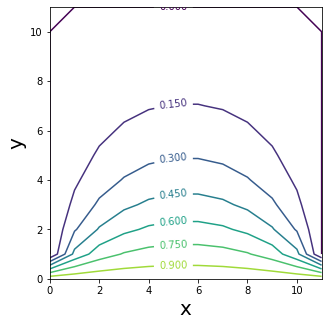

t =  0.001 , T_tot =  0.24999999099045347


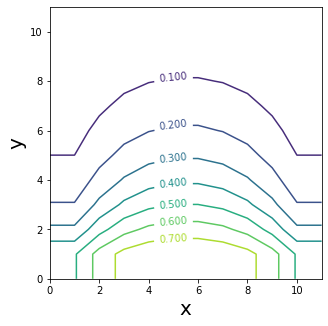

t =  0.01 , T_tot =  0.2499999902096369


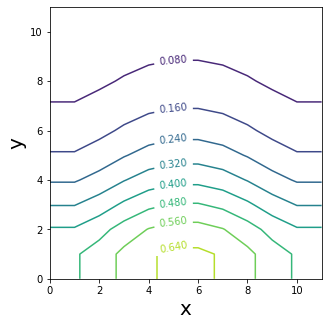

t =  0.1 , T_tot =  0.24999998911536836


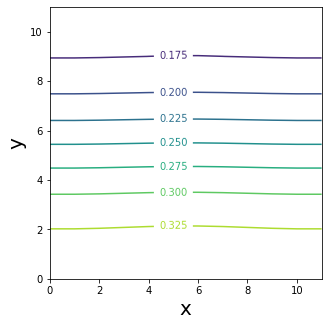

t =  1.0 , T_tot =  0.2499999890999783


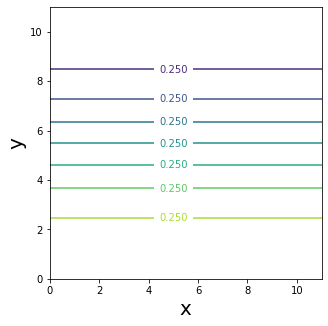

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def T_plot(T):
    fig = plt.figure(figsize=(5, 5))
    ax = fig.add_subplot(111)
    cntr = ax.contour(T.transpose())
    ax.clabel(cntr)
    ax.set_aspect('equal')
    ax.set_xlabel('x', fontsize=20)
    ax.set_ylabel('y', fontsize=20)
    plt.show()

def T_bulk_update(N, T, T_next):
    for i in range(1, N+1):
        for j in range(1, N+1):
            T_tmp = 0; count = 0
            if i >= 2:
                T_tmp += T[i-1, j]; count += 1
            if i <= N - 1:
                T_tmp += T[i+1, j]; count += 1
            if j >= 2:
                T_tmp += T[i, j-1]; count += 1
            if j <= N - 1:
                T_tmp += T[i, j+1]; count += 1
            T_next[i, j] = (1 - count * (dt/h**2)) * T[i,j] + (dt/h**2) * T_tmp
    for i in range(1, N+1):
        for j in range(1, N+1):
            T[i, j] = T_next[i, j]

def T_boundary_update(N, T, T_next):
    for i in range(1, N+1):
        T[i, 0] = T_next[i, 1]
        T[i, N+1] = T_next[i, N]
    for j in range(1, N+1):
        T[0, j] = T_next[1, j]
        T[N+1, j] = T_next[N, j]

def T_corner_points_update(N, T):
    T[0, 0] = (T[0, 1] + T[1, 0])/2.
    T[0, N+1] = (T[0, N] + T[1, N+1])/2.
    T[N+1, 0] = (T[N+1, 1] + T[N, 0])/2.
    T[N+1, N+1] = (T[N+1, N] + T[N, N+1])/2.

N = 10
T = np.zeros((N+2)**2)
T = T.reshape(N+2, N+2) # T[X, Y]
T[:, 0] = 1

for k in range(200):
    for i in range(1, N+1):
        for j in range(1, N+1):
            T[i, j] = 0.25 * (T[i-1, j] + T[i+1, j] + T[i, j-1] + T[i, j+1])

T_tot = 0
for i in range(0, N+2):
    for j in range(0, N+2):
        T_tot += T[i, j]/(N+2)**2
print("t = 0", ", T_tot = ", T_tot)
T_plot(T)

h = 1/(N+1)
dt = 0.001

T_next = np.zeros((N+2)**2)
T_next = T_next.reshape(N+2, N+2) # T_next[X, Y]
for k in range(1001):
    T_tot = 0
    T_bulk_update(N, T, T_next)
    T_boundary_update(N, T, T_next)
    T_corner_points_update(N, T)
    for i in range(0, N+2):
        for j in range(0, N+2):
            T_tot += T[i, j]/(N+2)**2
    if k == 0:
        print("t = ", dt * (k+1), ", T_tot = ", T_tot)
        T_plot(T)
    elif k == 9:
        print("t = ", dt * (k+1), ", T_tot = ", T_tot)
        T_plot(T)
    elif k == 99:
        print("t = ", dt * (k+1), ", T_tot = ", T_tot)
        T_plot(T)
    elif k == 999:
        print("t = ", dt * (k+1), ", T_tot = ", T_tot)
        T_plot(T)

# ↓1/25 のコード

In [ ]:
# Y = 0 のラインを T = 1 に 他の周りを T = 0 で固定
import numpy as np

N = 10
T = np.zeros((N+2)**2)
T = T.reshape(N+2, N+2) # T[X, Y]
T[:, 0] = 1

for k in range(200):
    for i in range(1, N+1):
        for j in range(1, N+1):
            T[i, j] = 0.25 * (T[i-1, j] + T[i+1, j] + T[i, j-1] + T[i, j+1])

for i in range(N+2):
    for j in range(N+2):
        print("{:.2f} ".format(T[j, N+1 - i]), end="")
    print()

print()

h = 1/(N+1)
dt = 0.001

T_next = np.zeros((N+2)**2)
T_next = T_next.reshape(N+2, N+2) # T_next[X, Y]

for k in range(1001):
    for i in range(1, N+1):
        for j in range(1, N+1):
            T_tmp = 0; count = 0
            if i >= 2:
                T_tmp += T[i-1, j]
                count += 1
            if i <= N - 1:
                T_tmp += T[i+1, j]
                count += 1
            if j >= 2:
                T_tmp += T[i, j-1]
                count += 1
            if j <= N - 1:
                T_tmp += T[i, j+1]
                count += 1
            T_next[i, j] = (1 - count * (dt/h**2)) * T[i,j] + (dt/h**2) * T_tmp
            
    for i in range(0, N+2):
        for j in range(0, N+2):
            if i == 0 and j == 0:
                pass
            elif i == 0 and j == N+1:
                pass
            elif i == N+1 and j == 0:
                pass
            elif i == N+1 and j == N+1:
                pass
            elif i == 0:
                T[i, j] = T_next[i+1, j]
            elif j == 0:
                T[i, j] = T_next[i, j+1]
            elif i == N+1:
                T[i, j] = T_next[i-1, j]
            elif j == N+1:
                T[i, j] = T_next[i, j-1]
            else:
                T[i, j] = T_next[i, j]
    T[0, 0] = (T[0, 1] + T[1, 0])/2.
    T[0, N+1] = (T[0, N] + T[1, N+1])/2.
    T[N+1, 0] = (T[N+1, 1] + T[N, 0])/2.
    T[N+1, N+1] = (T[N+1, N] + T[N, N+1])/2.
    if k == 9:
        print("t = ", dt * (k+1))
        for i in range(N+2):
            for j in range(N+2):
                print("{:.3f} ".format(T[j, N+1 - i]), end="")
            print()
        print()
    elif k == 99:
        print("t = ", dt * (k+1))
        for i in range(N+2):
            for j in range(N+2):
                print("{:.3f} ".format(T[j, N+1 - i]), end="")
            print()
        print()
    elif k == 199:
        print("t = ", dt * (k+1))
        for i in range(N+2):
            for j in range(N+2):
                print("{:.3f} ".format(T[j, N+1 - i]), end="")
            print()
        print()
    elif k == 299:
        print("t = ", dt * (k+1))
        for i in range(N+2):
            for j in range(N+2):
                print("{:.3f} ".format(T[j, N+1 - i]), end="")
            print()
        print()

0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 
0.00 0.01 0.02 0.02 0.03 0.03 0.03 0.03 0.02 0.02 0.01 0.00 
0.00 0.02 0.04 0.05 0.06 0.07 0.07 0.06 0.05 0.04 0.02 0.00 
0.00 0.03 0.06 0.08 0.10 0.11 0.11 0.10 0.08 0.06 0.03 0.00 
0.00 0.05 0.09 0.12 0.14 0.15 0.15 0.14 0.12 0.09 0.05 0.00 
0.00 0.06 0.12 0.17 0.20 0.21 0.21 0.20 0.17 0.12 0.06 0.00 
0.00 0.09 0.17 0.23 0.27 0.29 0.29 0.27 0.23 0.17 0.09 0.00 
0.00 0.13 0.23 0.31 0.36 0.38 0.38 0.36 0.31 0.23 0.13 0.00 
0.00 0.18 0.32 0.42 0.48 0.50 0.50 0.48 0.42 0.32 0.18 0.00 
0.00 0.28 0.46 0.57 0.62 0.65 0.65 0.62 0.57 0.46 0.28 0.00 
0.00 0.49 0.68 0.76 0.80 0.82 0.82 0.80 0.76 0.68 0.49 0.00 
1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 

t =  0.01
0.030 0.030 0.036 0.045 0.053 0.057 0.057 0.053 0.045 0.036 0.030 0.030 
0.030 0.030 0.036 0.045 0.053 0.057 0.057 0.053 0.045 0.036 0.030 0.030 
0.040 0.040 0.048 0.059 0.069 0.075 0.075 0.069 0.059 0.048 0.040 0.040 
0.058 0.058 0.069 0.086 0.100 0.108 0.

t = 0


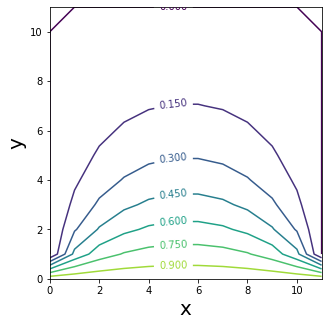

t =  0.001


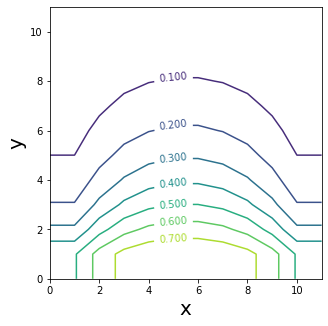

t =  0.01


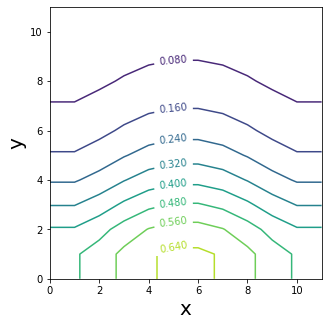

t =  0.1


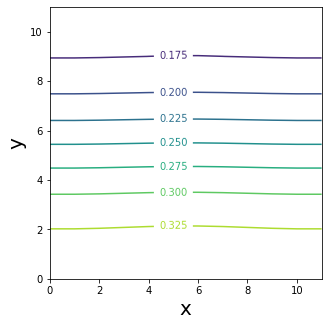

t =  1.0


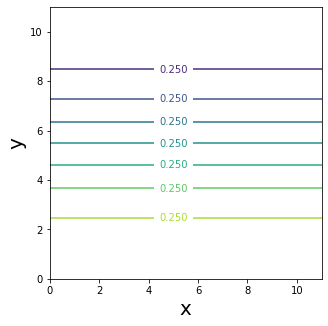

In [ ]:
# Y = 0 のラインを T = 1 に 他の周りを T = 0 で固定
import numpy as np
import matplotlib.pyplot as plt

N = 10
T = np.zeros((N+2)**2)
T = T.reshape(N+2, N+2) # T[X, Y]
T[:, 0] = 1

for k in range(200):
    for i in range(1, N+1):
        for j in range(1, N+1):
            T[i, j] = 0.25 * (T[i-1, j] + T[i+1, j] + T[i, j-1] + T[i, j+1])

print("t = 0")
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
cntr = ax.contour(T.transpose())
ax.clabel(cntr)
ax.set_aspect('equal')
ax.set_xlabel('x', fontsize=20)
ax.set_ylabel('y', fontsize=20)
plt.show()

h = 1/(N+1)
dt = 0.001

T_next = np.zeros((N+2)**2)
T_next = T_next.reshape(N+2, N+2) # T_next[X, Y]

for k in range(1001):
    for i in range(1, N+1):
        for j in range(1, N+1):
            T_tmp = 0; count = 0
            if i >= 2:
                T_tmp += T[i-1, j]
                count += 1
            if i <= N - 1:
                T_tmp += T[i+1, j]
                count += 1
            if j >= 2:
                T_tmp += T[i, j-1]
                count += 1
            if j <= N - 1:
                T_tmp += T[i, j+1]
                count += 1
            T_next[i, j] = (1 - count * (dt/h**2)) * T[i,j] + (dt/h**2) * T_tmp
            
    for i in range(0, N+2):
        for j in range(0, N+2):
            if i == 0 and j == 0:
                pass
            elif i == 0 and j == N+1:
                pass
            elif i == N+1 and j == 0:
                pass
            elif i == N+1 and j == N+1:
                pass
            elif i == 0:
                T[i, j] = T_next[i+1, j]
            elif j == 0:
                T[i, j] = T_next[i, j+1]
            elif i == N+1:
                T[i, j] = T_next[i-1, j]
            elif j == N+1:
                T[i, j] = T_next[i, j-1]
            else:
                T[i, j] = T_next[i, j]
    T[0, 0] = (T[0, 1] + T[1, 0])/2.
    T[0, N+1] = (T[0, N] + T[1, N+1])/2.
    T[N+1, 0] = (T[N+1, 1] + T[N, 0])/2.
    T[N+1, N+1] = (T[N+1, N] + T[N, N+1])/2.
    if k == 0:
        print("t = ", dt * (k+1))
        fig = plt.figure(figsize=(5, 5))
        ax = fig.add_subplot(111)
        cntr = ax.contour(T.transpose())
        ax.clabel(cntr)
        ax.set_aspect('equal')
        ax.set_xlabel('x', fontsize=20)
        ax.set_ylabel('y', fontsize=20)
        plt.show()
    elif k == 9:
        print("t = ", dt * (k+1))
        fig = plt.figure(figsize=(5, 5))
        ax = fig.add_subplot(111)
        cntr = ax.contour(T.transpose())
        ax.clabel(cntr)
        ax.set_aspect('equal')
        ax.set_xlabel('x', fontsize=20)
        ax.set_ylabel('y', fontsize=20)
        plt.show()
    elif k == 99:
        print("t = ", dt * (k+1))
        fig = plt.figure(figsize=(5, 5))
        ax = fig.add_subplot(111)
        cntr = ax.contour(T.transpose())
        ax.clabel(cntr)
        ax.set_aspect('equal')
        ax.set_xlabel('x', fontsize=20)
        ax.set_ylabel('y', fontsize=20)
        plt.show()
    elif k == 999:
        print("t = ", dt * (k+1))
        fig = plt.figure(figsize=(5, 5))
        ax = fig.add_subplot(111)
        cntr = ax.contour(T.transpose())
        ax.clabel(cntr)
        ax.set_aspect('equal')
        ax.set_xlabel('x', fontsize=20)
        ax.set_ylabel('y', fontsize=20)
        plt.show()

# ↓境界の条件を考慮していない誤ったバージョン

In [ ]:
# Y = 0 のラインを T = 1 に 他の周りを T = 0 で固定
import numpy as np

N = 10
T = np.zeros((N+2)**2)
T = T.reshape(N+2, N+2) # T[X, Y]
T[:, 0] = 1

for k in range(200):
    for i in range(1, N+1):
        for j in range(1, N+1):
            T[i, j] = 0.25 * (T[i-1, j] + T[i+1, j] + T[i, j-1] + T[i, j+1])

for i in range(N+2):
    for j in range(N+2):
        print("{:.2f} ".format(T[j, N+1 - i]), end="")
    print()

print()

h = 1/(N+1)
dt = 0.001

T_next = np.zeros((N+2)**2)
T_next = T_next.reshape(N+2, N+2) # T_next[X, Y]

for k in range(1001):
    for i in range(0, N+2):
        for j in range(0, N+2):
            T_tmp = 0
            if i - 1 >= 0:
                T_tmp += T[i-1, j]
            if i + 1 <= N+1:
                T_tmp += T[i+1, j]
            if j - 1 >= 0:
                T_tmp += T[i, j-1]
            if j + 1 <= N+1:
                T_tmp += T[i, j+1]
            T_next[i, j] = (1 - 4 * (dt/h**2)) * T[i,j] + (dt/h**2) * T_tmp
    for i in range(0, N+2):
        for j in range(0, N+2):
            T[i, j] = T_next[i, j]
    if k == 9:
        print("t = ", dt * (k+1))
        for i in range(N+2):
            for j in range(N+2):
                print("{:.3f} ".format(T[j, N+1 - i]), end="")
            print()
        print()
    elif k == 99:
        print("t = ", dt * (k+1))
        for i in range(N+2):
            for j in range(N+2):
                print("{:.3f} ".format(T[j, N+1 - i]), end="")
            print()
        print()
    elif k == 199:
        print("t = ", dt * (k+1))
        for i in range(N+2):
            for j in range(N+2):
                print("{:.3f} ".format(T[j, N+1 - i]), end="")
            print()
        print()
    elif k == 299:
        print("t = ", dt * (k+1))
        for i in range(N+2):
            for j in range(N+2):
                print("{:.3f} ".format(T[j, N+1 - i]), end="")
            print()
        print()

0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 
0.00 0.01 0.02 0.02 0.03 0.03 0.03 0.03 0.02 0.02 0.01 0.00 
0.00 0.02 0.04 0.05 0.06 0.07 0.07 0.06 0.05 0.04 0.02 0.00 
0.00 0.03 0.06 0.08 0.10 0.11 0.11 0.10 0.08 0.06 0.03 0.00 
0.00 0.05 0.09 0.12 0.14 0.15 0.15 0.14 0.12 0.09 0.05 0.00 
0.00 0.06 0.12 0.17 0.20 0.21 0.21 0.20 0.17 0.12 0.06 0.00 
0.00 0.09 0.17 0.23 0.27 0.29 0.29 0.27 0.23 0.17 0.09 0.00 
0.00 0.13 0.23 0.31 0.36 0.38 0.38 0.36 0.31 0.23 0.13 0.00 
0.00 0.18 0.32 0.42 0.48 0.50 0.50 0.48 0.42 0.32 0.18 0.00 
0.00 0.28 0.46 0.57 0.62 0.65 0.65 0.62 0.57 0.46 0.28 0.00 
0.00 0.49 0.68 0.76 0.80 0.82 0.82 0.80 0.76 0.68 0.49 0.00 
1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 

t =  0.01
0.003 0.006 0.009 0.013 0.015 0.016 0.016 0.015 0.013 0.009 0.006 0.003 
0.006 0.013 0.022 0.029 0.035 0.038 0.038 0.035 0.029 0.022 0.013 0.006 
0.011 0.024 0.039 0.052 0.063 0.068 0.068 0.063 0.052 0.039 0.024 0.011 
0.017 0.038 0.061 0.082 0.098 0.106 0.

t = 0


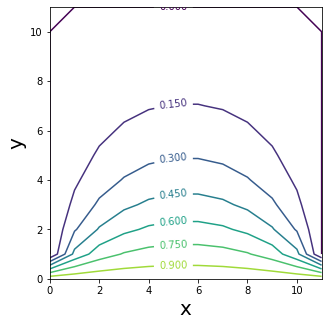

t =  0.001


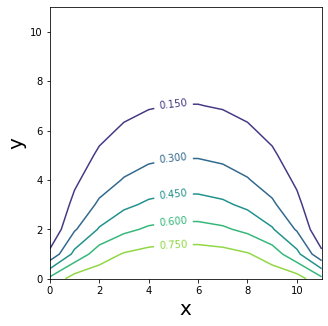

t =  0.01


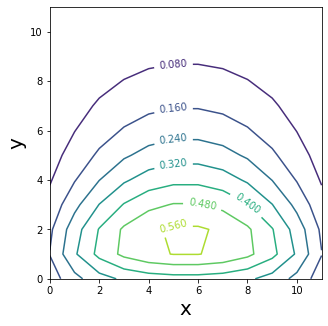

t =  0.1


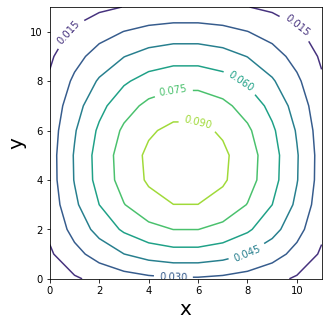

t =  1.0


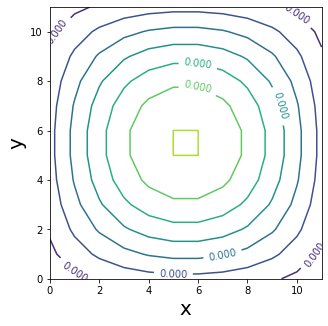

In [ ]:
# Y = 0 のラインを T = 1 に 他の周りを T = 0 で固定
import numpy as np
import matplotlib.pyplot as plt

N = 10
T = np.zeros((N+2)**2)
T = T.reshape(N+2, N+2) # T[X, Y]
T[:, 0] = 1

for k in range(200):
    for i in range(1, N+1):
        for j in range(1, N+1):
            T[i, j] = 0.25 * (T[i-1, j] + T[i+1, j] + T[i, j-1] + T[i, j+1])

print("t = 0")
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
cntr = ax.contour(T.transpose())
ax.clabel(cntr)
ax.set_aspect('equal')
ax.set_xlabel('x', fontsize=20)
ax.set_ylabel('y', fontsize=20)
plt.show()

h = 1/(N+1)
dt = 0.001

T_next = np.zeros((N+2)**2)
T_next = T_next.reshape(N+2, N+2) # T_next[X, Y]

for k in range(1001):
    for i in range(0, N+2):
        for j in range(0, N+2):
            T_tmp = 0
            if i - 1 >= 0:
                T_tmp += T[i-1, j]
            if i + 1 <= N+1:
                T_tmp += T[i+1, j]
            if j - 1 >= 0:
                T_tmp += T[i, j-1]
            if j + 1 <= N+1:
                T_tmp += T[i, j+1]
            T_next[i, j] = (1 - 4 * (dt/h**2)) * T[i,j] + (dt/h**2) * T_tmp
    for i in range(0, N+2):
        for j in range(0, N+2):
            T[i, j] = T_next[i, j]
    if k == 0:
        print("t = ", dt * (k+1))
        fig = plt.figure(figsize=(5, 5))
        ax = fig.add_subplot(111)
        cntr = ax.contour(T.transpose())
        ax.clabel(cntr)
        ax.set_aspect('equal')
        ax.set_xlabel('x', fontsize=20)
        ax.set_ylabel('y', fontsize=20)
        plt.show()
    elif k == 9:
        print("t = ", dt * (k+1))
        fig = plt.figure(figsize=(5, 5))
        ax = fig.add_subplot(111)
        cntr = ax.contour(T.transpose())
        ax.clabel(cntr)
        ax.set_aspect('equal')
        ax.set_xlabel('x', fontsize=20)
        ax.set_ylabel('y', fontsize=20)
        plt.show()
    elif k == 99:
        print("t = ", dt * (k+1))
        fig = plt.figure(figsize=(5, 5))
        ax = fig.add_subplot(111)
        cntr = ax.contour(T.transpose())
        ax.clabel(cntr)
        ax.set_aspect('equal')
        ax.set_xlabel('x', fontsize=20)
        ax.set_ylabel('y', fontsize=20)
        plt.show()
    elif k == 999:
        print("t = ", dt * (k+1))
        fig = plt.figure(figsize=(5, 5))
        ax = fig.add_subplot(111)
        cntr = ax.contour(T.transpose())
        ax.clabel(cntr)
        ax.set_aspect('equal')
        ax.set_xlabel('x', fontsize=20)
        ax.set_ylabel('y', fontsize=20)
        plt.show()

t = 0


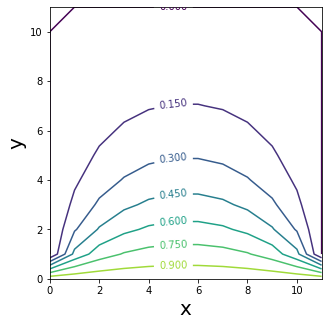

t =  0.01


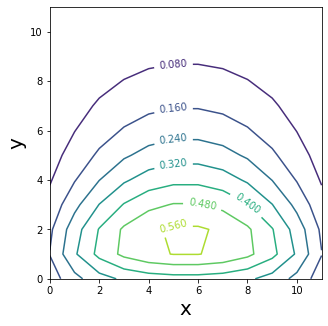

t =  0.1


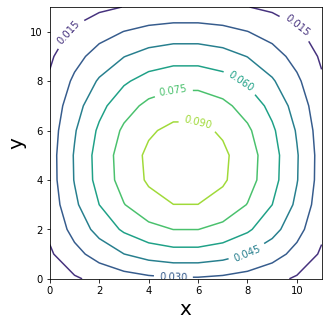

t =  0.2


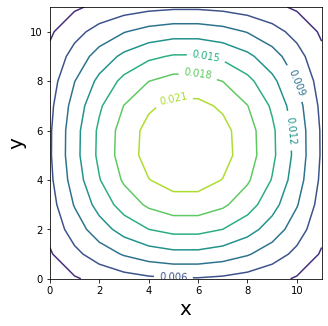

t =  0.3


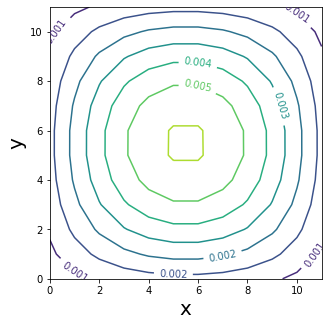

t =  0.5


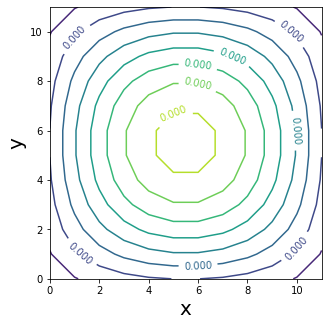

t =  0.8


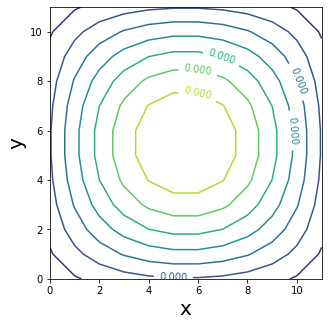

t =  1.0


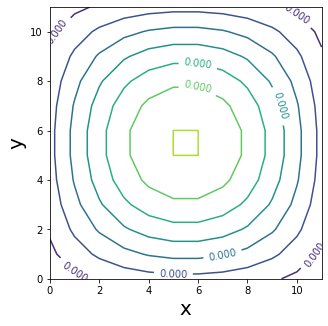

In [ ]:
# Y = 0 のラインを T = 1 に 他の周りを T = 0 で固定
import numpy as np
import matplotlib.pyplot as plt

N = 10
T = np.zeros((N+2)**2)
T = T.reshape(N+2, N+2) # T[X, Y]
T[:, 0] = 1

for k in range(200):
    for i in range(1, N+1):
        for j in range(1, N+1):
            T[i, j] = 0.25 * (T[i-1, j] + T[i+1, j] + T[i, j-1] + T[i, j+1])

print("t = 0")
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
cntr = ax.contour(T.transpose())
ax.clabel(cntr)
ax.set_aspect('equal')
ax.set_xlabel('x', fontsize=20)
ax.set_ylabel('y', fontsize=20)
plt.show()

h = 1/(N+1)
dt = 0.001

T_next = np.zeros((N+2)**2)
T_next = T_next.reshape(N+2, N+2) # T_next[X, Y]

for k in range(1001):
    for i in range(0, N+2):
        for j in range(0, N+2):
            T_tmp = 0
            if i - 1 >= 0:
                T_tmp += T[i-1, j]
            if i + 1 <= N+1:
                T_tmp += T[i+1, j]
            if j - 1 >= 0:
                T_tmp += T[i, j-1]
            if j + 1 <= N+1:
                T_tmp += T[i, j+1]
            T_next[i, j] = (1 - 4 * (dt/h**2)) * T[i,j] + (dt/h**2) * T_tmp
    for i in range(0, N+2):
        for j in range(0, N+2):
            T[i, j] = T_next[i, j]
    if k == 9:
        print("t = ", dt * (k+1))
        fig = plt.figure(figsize=(5, 5))
        ax = fig.add_subplot(111)
        cntr = ax.contour(T.transpose())
        ax.clabel(cntr)
        ax.set_aspect('equal')
        ax.set_xlabel('x', fontsize=20)
        ax.set_ylabel('y', fontsize=20)
        plt.show()
    elif k == 99:
        print("t = ", dt * (k+1))
        fig = plt.figure(figsize=(5, 5))
        ax = fig.add_subplot(111)
        cntr = ax.contour(T.transpose())
        ax.clabel(cntr)
        ax.set_aspect('equal')
        ax.set_xlabel('x', fontsize=20)
        ax.set_ylabel('y', fontsize=20)
        plt.show()
    elif k == 199:
        print("t = ", dt * (k+1))
        fig = plt.figure(figsize=(5, 5))
        ax = fig.add_subplot(111)
        cntr = ax.contour(T.transpose())
        ax.clabel(cntr)
        ax.set_aspect('equal')
        ax.set_xlabel('x', fontsize=20)
        ax.set_ylabel('y', fontsize=20)
        plt.show()
    elif k == 299:
        print("t = ", dt * (k+1))
        fig = plt.figure(figsize=(5, 5))
        ax = fig.add_subplot(111)
        cntr = ax.contour(T.transpose())
        ax.clabel(cntr)
        ax.set_aspect('equal')
        ax.set_xlabel('x', fontsize=20)
        ax.set_ylabel('y', fontsize=20)
        plt.show()
    elif k == 499:
        print("t = ", dt * (k+1))
        fig = plt.figure(figsize=(5, 5))
        ax = fig.add_subplot(111)
        cntr = ax.contour(T.transpose())
        ax.clabel(cntr)
        ax.set_aspect('equal')
        ax.set_xlabel('x', fontsize=20)
        ax.set_ylabel('y', fontsize=20)
        plt.show()
    elif k == 799:
        print("t = ", dt * (k+1))
        fig = plt.figure(figsize=(5, 5))
        ax = fig.add_subplot(111)
        cntr = ax.contour(T.transpose())
        ax.clabel(cntr)
        ax.set_aspect('equal')
        ax.set_xlabel('x', fontsize=20)
        ax.set_ylabel('y', fontsize=20)
        plt.show()
    elif k == 999:
        print("t = ", dt * (k+1))
        fig = plt.figure(figsize=(5, 5))
        ax = fig.add_subplot(111)
        cntr = ax.contour(T.transpose())
        ax.clabel(cntr)
        ax.set_aspect('equal')
        ax.set_xlabel('x', fontsize=20)
        ax.set_ylabel('y', fontsize=20)
        plt.show()

# ↓問題を作成するまでに作成したプログラム

In [ ]:
# Y = 0 のラインを u = 1 に 他の周りを u = 0 で固定
 
import numpy as np

N = 10
u = np.zeros((N+2)**2)
u = u.reshape(N+2, N+2) # u[X, Y]
u[:, 0] = 1

print(u)

for k in range(200):
    r_max = 0
    for i in range(1, N+1):
        for j in range(1, N+1):
            u_tmp = u[i-1, j] + u[i+1, j] + u[i, j-1] + u[i, j+1]
            r_tmp = abs(u[i,j] - 0.25 * u_tmp)
            u[i, j] = 0.25 * u_tmp
            if r_max < r_tmp and r_tmp > 0:
                r_max = r_tmp
    if r_max <= 10**-8:
        print("k", k, "r_max", r_max)
        break


for i in range(N+2):
    for j in range(N+2):
        print("{:.2f} ".format(u[j, N+1 - i]), end="")
    print()

'''
for i in u:
    for j in i:
        print(j)
    print()
'''

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
k 180 r_max 9.457142680080466e-09
0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 
0.00 0.01 0.02 0.02 0.03 0.03 0.03 0.03 0.02 0.02 0.01 0.00 
0.00 0.02 0.04 0.05 0.06 0.07 0.07 0.06 0.05 0.04 0.02 0.00 
0.00 0.03 0.06 0.08 0.10 0.11 0.11 0.10 0.08 0.06 0.03 0.00 
0.00 0.05 0.09 0.12 0.14 0.15 0.15 0.14 0.12 0.09 0.05 0.00 
0.00 0.06 0.12 0.17 0.20 0.21 0.21 0.20 0.17 0.12 0.06 0.00 
0.00 0.09 0.17 0.23 0.27 0.29 0.29 0.27 0.23 0.17 0.09 0.00 
0.00 0.13 0.23 0.31 0.36 0.38 0.38 0.36 0.31 0.23 0.13 0.00 
0.00 0.18

'\nfor i in u:\n    for j in i:\n        print(j)\n    print()\n'

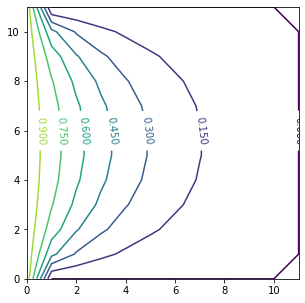

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
cntr = ax.contour(u)
ax.clabel(cntr)
ax.set_aspect('equal')
plt.show()

[[1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
1.00 1.00 1.00 1.00 1.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 
1.00 1.00 1.00 1.00 1.00 0.48 0.26 0.15 0.09 0.05 0.02 0.00 
1.00 1.00 1.00 1.00 1.00 0.65 0.41 0.26 0.16 0.10 0.04 0.00 
1.00 1.00 1.00 1.00 1.00 0.70 0.48 0.32 0.21 0.12 0.06 0.00 
1.00 1.00 1.00 1.00 1.00 0.68 0.48 0.33 0.22 0.13 0.06 0.00 
0.00 0.48 0.65 0.70 0.68 0.55 0.42 0.30 0.21 0.13 0.06 0.00 
0.00 0.26 0.41 0.48 0.48 0.42 0.33 0.25 0.18 0.12 0.06 0.00 
0.00 0.15 0.26 0.32 0.33 0.30 0.25 0.20 0.15 0.10 0.05 0.00 
0.00 0.09 0.16 0.21 0.22 0.21 0.18 0.15 0.1

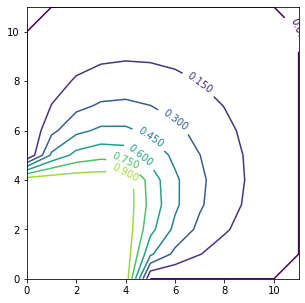

In [ ]:
# 減点周り4点を温める
 
import numpy as np

N = 10
M = 2
u = np.zeros((N+2)**2)
u = u.reshape(N+2, N+2) # u[X, Y]
u[0:N//M, 0:N//M] = 1

print(u)

for k in range(100):
    for i in range(1, N+1):
        for j in range(1, N+1):
            if i >= N//M or j >= N//M:
                r = u[i-1, j] + u[i+1, j] + u[i, j-1] + u[i, j+1]
                #print(u[i,j] - r * 0.25)
                u[i, j] = 0.25* r

#print(u)
for y in u:
    for x in y:
        print("{:.2f} ".format(x), end="")
    print()

import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
cntr = ax.contour(u)
ax.clabel(cntr)
ax.set_aspect('equal')
plt.show()